In [3]:
library(Seurat)
library(stringr)
library(data.table)

# Metadata

In [2]:
meta = read.csv("../Reviews/hSkin_scRNAseq/Skin_6Control_Metadata.csv", row.names = 1)

In [4]:
reannotate_clusters = data.frame(cluster = seq(0, 18),
                                 reannotate = c("Fibroblast", "Keratinocyte", "Endothelial_cell", "Fibroblast", "Fibroblast", "Keratinocyte",
                                                "Pericyte", "Keratinocyte", "Macrophage.DC", "Lymphocyte", "Pericyte", "Keratinocyte",
                                                "Secretory_epithelial", "Smooth_muscle", "Keratinocyte", "Melanocyte", "Neural_cell", "Cornified Env", "B_cell"))

In [5]:
meta$celltype = reannotate_clusters[match(meta$res.0.6, reannotate_clusters$cluster), "reannotate"]

# Unprocessed Data

In [7]:
skin.data <- read.csv("../Reviews/hSkin_scRNAseq/Skin_6Control_rawUMI.csv", row.names = 1)

In [8]:
skin <- CreateSeuratObject(skin.data, meta.data = meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [9]:
skin

An object of class Seurat 
32738 features across 8522 samples within 1 assay 
Active assay: RNA (32738 features)

# QC and filter according to 29080679

In [10]:
skin[["percent.mt"]] <- PercentageFeatureSet(skin, pattern = "MT-")

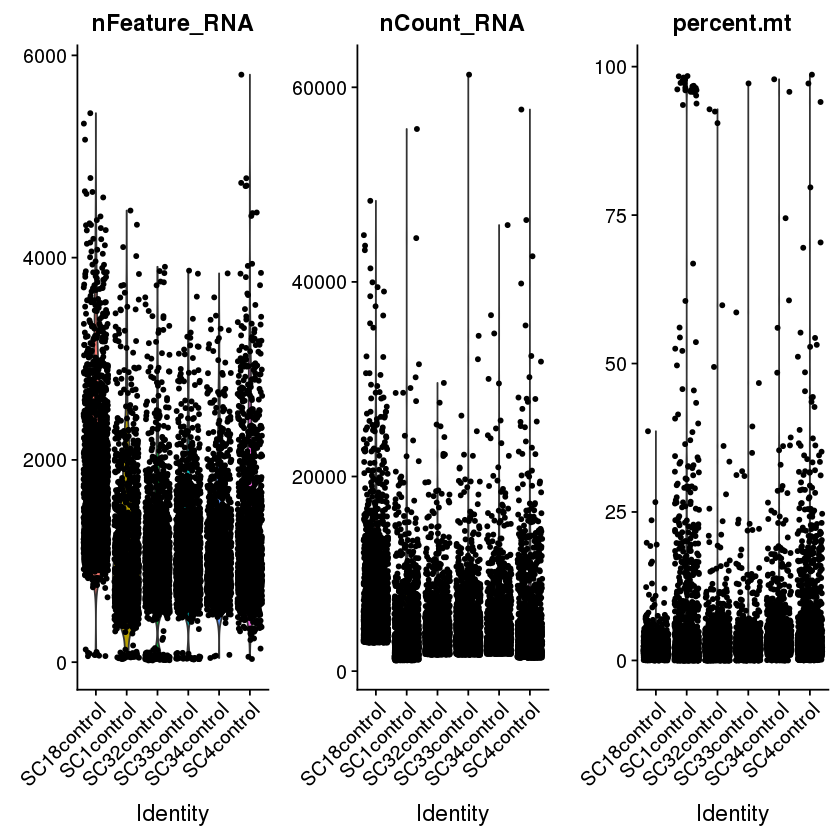

In [11]:
VlnPlot(skin, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [17]:
skin <- subset(skin, subset = nFeature_RNA > 200)

In [18]:
skin <- NormalizeData(skin, verbose = FALSE)

In [19]:
skin = FindVariableFeatures(skin, selection.method = "vst", nfeatures = 2000, verbose = FALSE)

In [20]:
skin <- ScaleData(skin, vars.to.regress = c("nUMI", "percent.mito"))

Regressing out nUMI, percent.mito
Centering and scaling data matrix


In [21]:
skin <- RunPCA(skin, npcs = 30, verbose = FALSE)

In [22]:
skin <- RunUMAP(skin, reduction = "pca", dims = 1:24)

In [23]:
human_skin_epidermis <- skin

In [24]:
human_skin_epidermis@meta.data$celltype_cluster = paste(human_skin_epidermis@meta.data$celltype, human_skin_epidermis@meta.data$res.0.6, sep = "_")

In [25]:
Idents(object = human_skin_epidermis) <- human_skin_epidermis@meta.data$res.0.6

In [26]:
human_skin_epidermis = subset(human_skin_epidermis, idents = c(0, 1, 3, 4, 5, 7, 9, 11, 14, 17))

In [27]:
human_skin_epidermis

An object of class Seurat 
32738 features across 5670 samples within 1 assay 
Active assay: RNA (32738 features)
 2 dimensional reductions calculated: pca, umap

In [29]:
# recluster
human_skin_epidermis <- FindVariableFeatures(human_skin_epidermis)
human_skin_epidermis <- ScaleData(human_skin_epidermis)
human_skin_epidermis <- RunPCA(human_skin_epidermis)
human_skin_epidermis <- FindNeighbors(human_skin_epidermis, dims = 1:10)
human_skin_epidermis <- FindClusters(human_skin_epidermis, resolution = 0.5)
human_skin_epidermis <- RunUMAP(human_skin_epidermis, dims = 1:10)

Centering and scaling data matrix


PC_ 1 
Positive:  DCN, CFD, COL1A2, TIMP1, GSN, FBLN1, LUM, IGFBP7, COL6A1, APOD 
	   CFH, CTSK, COL1A1, CCDC80, MGP, DPT, MMP2, SPARC, COL3A1, SFRP2 
	   CLU, CXCL12, TIMP3, NNMT, CPE, FSTL1, WISP2, FHL1, IGFBP4, PDGFRL 
Negative:  PERP, S100A14, DMKN, TACSTD2, SFN, LGALS7B, SBSN, LYPD3, KRTDAP, LY6D 
	   AQP3, DSP, CALML5, SERPINB5, CTNNBIP1, MIR205HG, C19orf33, HOPX, KLK11, KRT1 
	   PHLDA2, KRT10, LGALS7, KLF5, RHOV, DSG1, SPINK5, JUP, PKP1, RAB25 
PC_ 2 
Positive:  RPS2, MIR205HG, KRT5, KRT14, SFN, S100A14, AQP3, S100A2, LY6D, KLF5 
	   CKS2, H2AFZ, DSP, PMAIP1, TACSTD2, SERPINB5, SLC25A5, MT-CO1, SOX15, ZC3H12A 
	   MT-CO2, PTTG1, LGALS7B, FAM213A, CA2, MYC, TNFRSF18, EFNA1, PERP, ADRB2 
Negative:  LOR, FLG2, SPRR2E, ASPRV1, NCCRP1, PSORS1C2, CRCT1, C1orf68, AZGP1, FLG 
	   CST6, ABHD12B, CDSN, IL37, LCE1C, DNASE1L2, FAM25A, KPRP, GSDMA, C9orf169 
	   LCE1B, PSAPL1, HAL, LCE1A, LCE2B, ARG1, SPRR2G, LCE1F, KLK5, LCE2C 
PC_ 3 
Positive:  SRGN, CD52, CXCR4, SAMSN1, IL32, LTB, CD3D, 

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5670
Number of edges: 183065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9092
Number of communities: 12
Elapsed time: 0 seconds


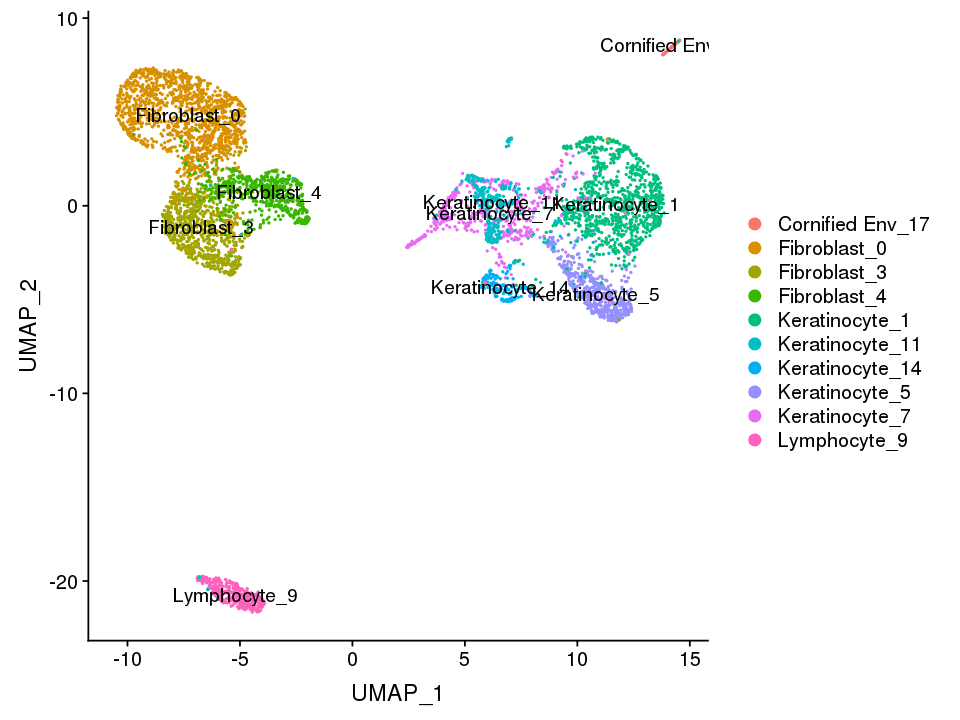

In [30]:
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(human_skin_epidermis, reduction = "umap", group.by = "celltype_cluster", label = T)